In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
print ('to read the fle') 
f1=pd.read_csv('Fever.csv')

to read the fle


In [173]:
print(' to check the variables type') 
f1.info()

 to check the variables type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [66]:
print('Column A, Coumn B , Column  Volunteer are showing Integer , We have to convert into categorical Variables before performing the ANOVA TEST')

Column A, Coumn B , Column  Volunteer are showing Integer , We have to convert into categorical Variables before performing the ANOVA TEST


In [64]:
print('to check top 5 records')
f1.head(5)

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [174]:
print('Checking the dimension of the dataframe')
f1.shape
print ('there are number of rows  in the dataset',f1.shape[0])
print ('there are number of columns  in the dataset',f1.shape[1])

Checking the dimension of the dataframe
there are number of rows  in the dataset 36
there are number of columns  in the dataset 4


In [171]:
print('converting the data type of  Volunteer into categorical variable')
f1.Volunteer=pd.Categorical(f1.Volunteer)

converting the data type of  Volunteer into categorical variable


In [170]:
print('converting the data type of  A into categorical variable')
f1.A=pd.Categorical(f1.A)

converting the data type of  A into categorical variable


In [169]:
print('converting the data type of  B into categorical variable')
f1.B=pd.Categorical(f1.B)

converting the data type of  B into categorical variable


In [167]:
print('Checking the data type after converting into categorical variables')
f1.info()

Checking the data type after converting into categorical variables
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null category
B            36 non-null category
Volunteer    36 non-null category
Relief       36 non-null float64
dtypes: category(3), float64(1)
memory usage: 924.0 bytes


In [166]:
print('Checking the summary of the dataframe')
f1.describe()

Checking the summary of the dataframe


,Relief
count,36.000000
mean,7.183333
std,3.272090
min,2.300000
25%,4.675000
50%,6.000000
75%,9.325000
max,13.500000


In [165]:
print('Checking distinct values of Volunteer')

f1.Volunteer.value_counts()

Checking distinct values of Volunteer


4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

In [31]:
print('Checking distinct values of variable A')
f1.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [164]:
print('Checking distinct values of variable B')
f1.B.value_counts()

Checking distinct values of variable B


3    12
2    12
1    12
Name: B, dtype: int64

checking the outliers


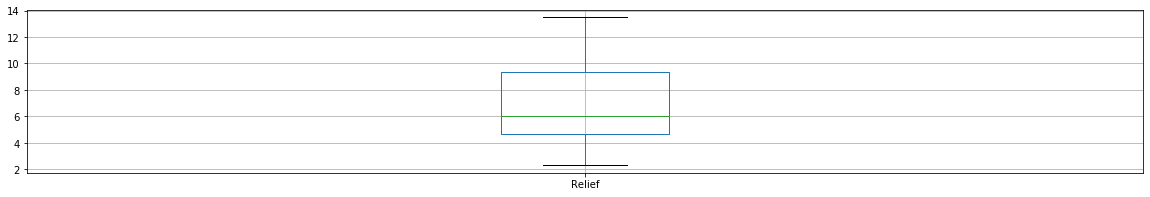

In [163]:
print('checking the outliers')
f1.boxplot(figsize=(20,3))

In [175]:

print('1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually')
#Formulate the Null and Alternate Hypothesis

# Formulate the Null and Alternate Hypothesis for Variable A

print('Formulate the Null and Alternate Hypothesis for Variable A')
print('𝐻0 (Null Hypothesis)')
print('There are 3 Levels of variable A is given in Dataset')
print('H0: Mean of A level 1(MA1) =Mean of A level 2(MA2)=Mean of A  level 3(MA3)')
print('𝐻1 (Alternate Hypothesis)')
print('H1: At least one Mean is different among 3 levels of A')

    
# Formulate the Null and Alternate Hypothesis for Variable B
print('Formulate the Null and Alternate Hypothesis for Variable B')
print('𝐻0 (Null Hypothesis)')
print('There are 3 levels of variable B is given in Dataset')
print('H0: Mean of B level 1(MB1) =Mean of B level 2(MB2)=Mean of B level 3(MB3)')
print('𝐻1 (Alternate Hypothesis)')
print('H1: At least one Mean is different among 3 levels of B')
    

1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually
Formulate the Null and Alternate Hypothesis for Variable A
𝐻0 (Null Hypothesis)
There are 3 Levels of variable A is given in Dataset
H0: Mean of A level 1(MA1) =Mean of A level 2(MA2)=Mean of A  level 3(MA3)
𝐻1 (Alternate Hypothesis)
H1: At least one Mean is different among 3 levels of A
Formulate the Null and Alternate Hypothesis for Variable B
𝐻0 (Null Hypothesis)
There are 3 levels of variable B is given in Dataset
H0: Mean of B level 1(MB1) =Mean of B level 2(MB2)=Mean of B level 3(MB3)
𝐻1 (Alternate Hypothesis)
H1: At least one Mean is different among 3 levels of B


In [93]:
#1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. 
#State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

print('𝐻0 (Null Hypothesis)')
print('H0: The means of Relief variable with respect to  A Ingredient  at all 3 levels is equal')
print('𝐻1 (Alternate Hypothesis)')
print('H1: At least one of the means of Relief variable with respect to A Ingredient at all 3 levels is unequal')

formula='Relief~ C(A)'
model = ols(formula, f1).fit()
aov_table = anova_lm(model)
print(aov_table)

𝐻0 (Null Hypothesis)
H0: The means of Relief variable with respect to  A Ingredient  at all 3 levels is equal
𝐻1 (Alternate Hypothesis)
H1: At least one of the means of Relief variable with respect to A Ingredient at all 3 levels is unequal
            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [97]:
print('Conclusion: Since the p value is less than the significance level (0.05), we reject the null hypothesis and conclude that') 
print('At least one mean of A among different levels is unequal')

Conclusion: Since the p value is less than the significance level (0.05), we reject the null hypothesis and conclude that
At least one mean of A among different levels is unequal


In [94]:
#1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. 
#State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

print('𝐻0 (Null Hypothesis)')
print('H0: The means of Relief variable with respect to  B Ingredient  at all 3 levels is equal')
print('𝐻1 (Alternate Hypothesis)')
print('H1: At least one of the means of Relief variable with respect to B Ingredient at all 3 levels is unequal')

formula='Relief~ C(B)'
model = ols(formula, f1).fit()
aov_table = anova_lm(model)
print(aov_table)

𝐻0 (Null Hypothesis)
H0: The means of Relief variable with respect to  B Ingredient  at all 3 levels is equal
𝐻1 (Alternate Hypothesis)
H1: At least one of the means of Relief variable with respect to B Ingredient at all 3 levels is unequal
            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


In [98]:
print('Conclusion: Since the p value is less than the significance level (0.05), we reject the null hypothesis and conclude that') 
print('At least one  means of B among different levels is unequal')

Conclusion: Since the p value is less than the significance level (0.05), we reject the null hypothesis and conclude that
At least one  means of B among different levels is unequal


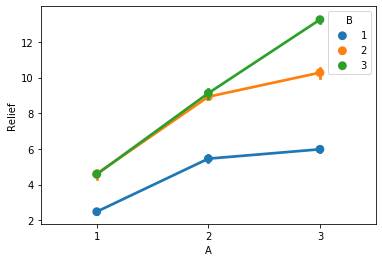

In [36]:
#1.4) Analyse the effects of one variable on another with the help of an interaction plot.
#What is an interaction between two treatments?
sns.pointplot(x='A', y='Relief', data=f1,hue='B')

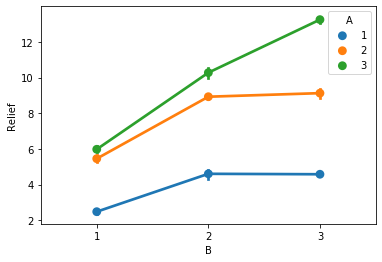

In [44]:
sns.pointplot(x='B', y='Relief', data=f1,hue='A')

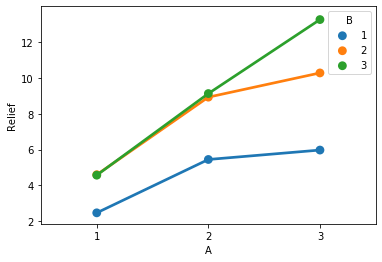

In [51]:
sns.pointplot(x='A', y='Relief', data=f1,hue='B',ci=None)

In [59]:
formula = 'Relief ~ C(A) + C(B) +C(A):C(B)'
model2 = ols(formula, f1).fit()
aov_table2 = anova_lm(model2)
print(aov_table2)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [82]:
#Note : Interference need to be written
print('We have drawn the point plot as well as calculated the interaction statistically')
print('From the point plot and statistically we can conclude Variable A and Variable B are Interacted')

We have drawn the point plot as well as calculated the interaction statistically
From the point plot and statistically we can conclude Variable A and Variable B are Interacted


In [83]:
#1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.
# Formulate the Null and Alternate Hypothesis for Variable B


print('𝐻0 (Null Hypothesis)')
print('H0: The means of Relief variable with respect to each A and B Ingredient at all 3 levels is equal')
print('𝐻1 (Alternate Hypothesis)')
print('H1: At least one of the means of Relief variable with respect to A and B Ingredient at all 3 levels is unequal')





𝐻0 (Null Hypothesis)
H0: The means of Relief variable with respect to each A and B Ingredient at all 3 levels is equal
𝐻1 (Alternate Hypothesis)
H1: At least one of the means of Relief variable with respect to A and B Ingredient at all 3 levels is unequal


In [54]:
# performing two anova test
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, f1).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [55]:
print('Conclusion: Since the p value is less than the significance level (0.05), we reject the null hupothesis and conclude that') 
print('At least one of the means of Relief variable with respect to A and B variable Category is unequal')

Conclusion: Since the p value is less than the significance level (0.05), we reject the null hupothesis and conclude that
At least one of the means of Relief variable with respect to A and B variable Category is unequal


In [96]:
#1.6) Mention the business implications of performing ANOVA for this particular case study.
print('There are the following business implications of performing ANOVA .') 
print('Anova (Analysis of variance) is technique, it is hypothesis test to compare several means .')
print('We Will able to get the answers of the following questions as far as ANOVA Test is concerned .') 
print('Does Ingredient A matter when it comes to new compound for Relief .') 
print('Does Ingredient B matter when it comes to new compound for Relief . ')
print('Does Ingredient A and B matter when it comes to new compound for Relief . ')
print('From the test it is quite clear that Ingredient A /Ingredient B/ Both Ingredient A and Ingredient B play the significant role ')
print('in the compound of Relief .') 


There are the following business implications of performing ANOVA .
Anova (Analysis of variance) is technique, it is hypothesis test to compare several means .
We Will able to get the answers of the following questions as far as ANOVA Test is concerned .
Does Ingredient A matter when it comes to new compound for Relief .
Does Ingredient B matter when it comes to new compound for Relief . 
Does Ingredient A and B matter when it comes to new compound for Relief . 
From the test it is quite clear that Ingredient A /Ingredient B/ Both Ingredient A and Ingredient B play the significant role 
in the compound of Relief .


In [86]:
e1=pd.read_csv('Education.csv')


In [180]:
print('2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed') 
print('Checking the top 5 records')
e1.head()

2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed
Checking the top 5 records


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [179]:
print('Checking the dimension of the dataframe')
e1.shape
print ('there are number of rows  in the dataset',e1.shape[0])
print ('there are number of columns  in the dataset',e1.shape[1])

Checking the dimension of the dataframe
there are number of rows  in the dataset 777
there are number of columns  in the dataset 18


In [178]:
print('checking the data types of the dataset')
e1.dtypes

checking the data types of the dataset


Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [177]:
print('Summary of the dataset')
e1.describe()

Summary of the dataset


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [176]:
print(' Check for missing value in any column')
e1.isna().sum()

 Check for missing value in any column


Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [181]:
print('Checking for duplicate data')

dups = e1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

e1[dups]

Checking for duplicate data
Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


Uni-variate analysis


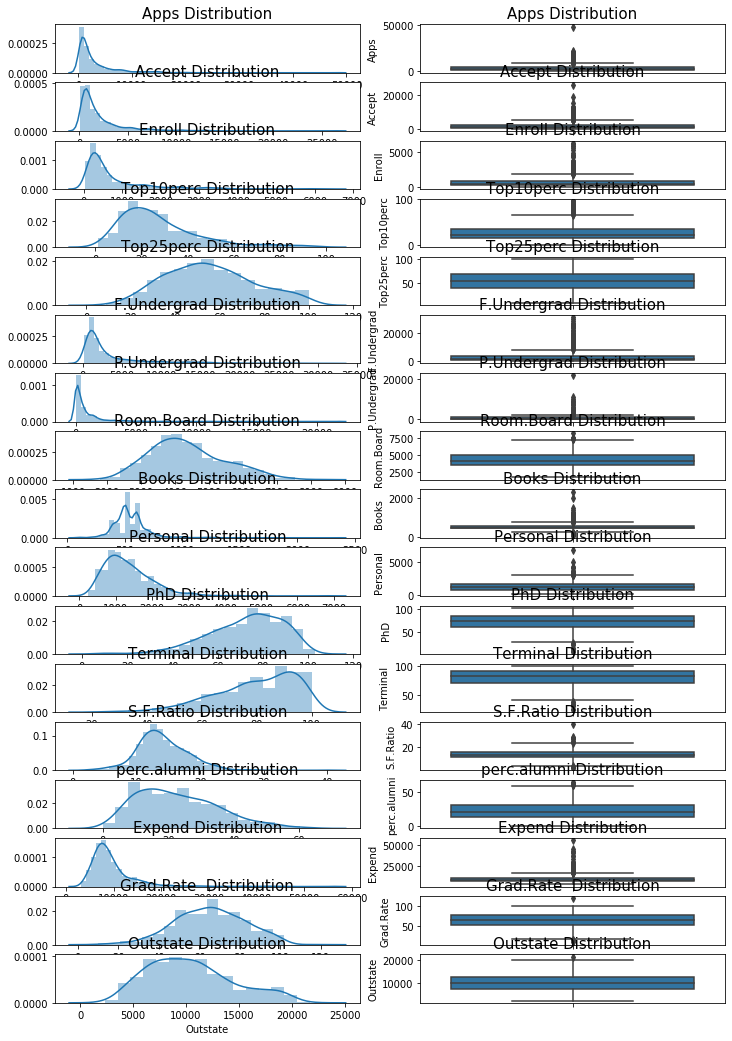

In [182]:
print('Uni-variate analysis')

fig, axes = plt.subplots(nrows=17,ncols=2)

fig.set_size_inches(12,18)
    
a = sns.distplot(e1['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=15)
a = sns.boxplot(e1['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(e1['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=15)

a = sns.boxplot(e1['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=15)

a = sns.distplot(e1['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=15)

a = sns.boxplot(e1['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=15)


a = sns.distplot(e1['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.boxplot(e1['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.distplot(e1['Top25perc'] , ax=axes[4][0])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.boxplot(e1['Top25perc'] , orient = "v" , ax=axes[4][1])
a.set_title("Top25perc Distribution",fontsize=15)


a = sns.distplot(e1['F.Undergrad'] , ax=axes[5][0])
a.set_title("F.Undergrad Distribution",fontsize=15)
a = sns.boxplot(e1['F.Undergrad'] , orient = "v" , ax=axes[5][1])
a.set_title("F.Undergrad Distribution",fontsize=15)


a = sns.distplot(e1['P.Undergrad'] , ax=axes[6][0])
a.set_title("P.Undergrad Distribution",fontsize=15)
a = sns.boxplot(e1['P.Undergrad'] , orient = "v" , ax=axes[6][1])
a.set_title("P.Undergrad Distribution",fontsize=15)

a = sns.distplot(e1['Room.Board'] , ax=axes[7][0])
a.set_title("Room.Board Distribution",fontsize=15)
a = sns.boxplot(e1['Room.Board'] , orient = "v" , ax=axes[7][1])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.distplot(e1['Books'] , ax=axes[8][0])
a.set_title("Books Distribution",fontsize=15)
a = sns.boxplot(e1['Books'] , orient = "v" , ax=axes[8][1])
a.set_title("Books Distribution",fontsize=15)

a = sns.distplot(e1['Personal'] , ax=axes[9][0])
a.set_title("Personal Distribution",fontsize=15)
a = sns.boxplot(e1['Personal'] , orient = "v" , ax=axes[9][1])
a.set_title("Personal Distribution",fontsize=15)

a = sns.distplot(e1['PhD'] , ax=axes[10][0])
a.set_title("PhD Distribution",fontsize=15)
a = sns.boxplot(e1['PhD'] , orient = "v" , ax=axes[10][1])
a.set_title("PhD Distribution",fontsize=15)


a = sns.distplot(e1['Terminal'] , ax=axes[11][0])
a.set_title("Terminal Distribution",fontsize=15)
a = sns.boxplot(e1['Terminal'] , orient = "v" , ax=axes[11][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(e1['S.F.Ratio'] , ax=axes[12][0])
a.set_title("S.F.Ratio Distribution",fontsize=15)
a = sns.boxplot(e1['S.F.Ratio'] , orient = "v" , ax=axes[12][1])
a.set_title("S.F.Ratio Distribution",fontsize=15)


a = sns.distplot(e1['perc.alumni'] , ax=axes[13][0])
a.set_title("perc.alumni Distribution",fontsize=15)
a = sns.boxplot(e1['perc.alumni'] , orient = "v" , ax=axes[13][1])
a.set_title("perc.alumni Distribution",fontsize=15)

a = sns.distplot(e1['Expend'] , ax=axes[14][0])
a.set_title("Expend Distribution",fontsize=15)
a = sns.boxplot(e1['Expend'] , orient = "v" , ax=axes[14][1])
a.set_title("Expend Distribution",fontsize=15)


a = sns.distplot(e1['Grad.Rate'] , ax=axes[15][0])
a.set_title("Grad.Rate  Distribution",fontsize=15)
a = sns.boxplot(e1['Grad.Rate'] , orient = "v" , ax=axes[15][1])
a.set_title("Grad.Rate  Distribution",fontsize=15)

a = sns.distplot(e1['Outstate'] , ax=axes[16][0])
a.set_title("Outstate Distribution",fontsize=15)
a = sns.boxplot(e1['Outstate'] , orient = "v" , ax=axes[16][1])
a.set_title("Outstate Distribution",fontsize=15)

plt.show()


In [184]:
print('Bi- Variate Analysis:')
print('Check for correlation among variables')
e1.corr(method='pearson')

Bi- Variate Analysis:
Check for correlation among variables


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


 plot the correlation coefficients as a heatmap


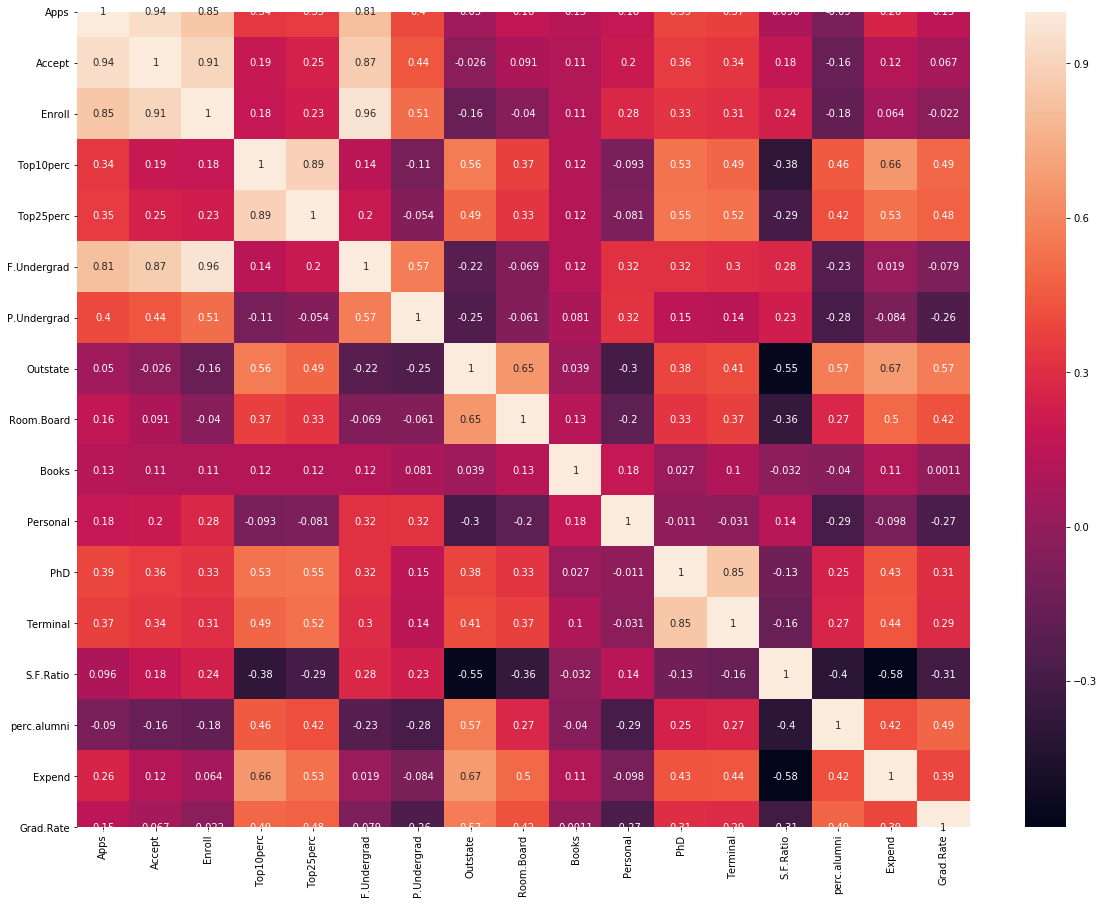

In [185]:
print(' plot the correlation coefficients as a heatmap')
plt.subplots(figsize=(20,15))
sns.heatmap(e1.corr(), annot=True)  

In [186]:
print('interference from above data')

print('In the given dataset There are 777 rows and 18 columns.There is Neither Missing value nor any duplicate rows.') 
print('From the univariate it is quite clear Apps,Accept,Enroll,Top10perc ,top25perc ,P.undergrad, room.board etc Most of variables')
print('are not normally distributed. Number of variables like Apps,Accept,books,personal,outstate,Extend,S.F ratio,perk.alumnni,')
print('grad.rate having outliers .')
print('We have drawn the Covariance and Correlation Matrix for the given dataset .')
print('Covariance indicates the direction of the linear relationship between variables.') 
print('while Correlation on the other hand measures both the strength and direction of the linear relationship between two variables.')
print('Correlation is a function of the covariance.')

interference from above data
In the given dataset There are 777 rows and 18 columns.There is Neither Missing value nor any duplicate rows.
From the univariate it is quite clear Apps,Accept,Enroll,Top10perc ,top25perc ,P.undergrad, room.board etc Most of variables
are not normally distributed. Number of variables like Apps,Accept,books,personal,outstate,Extend,S.F ratio,perk.alumnni,
grad.rate having outliers .
We have drawn the Covariance and Correlation Matrix for the given dataset .
Covariance indicates the direction of the linear relationship between variables.
while Correlation on the other hand measures both the strength and direction of the linear relationship between two variables.
Correlation is a function of the covariance.


In [187]:
print('2.2) Scale the variables and write the inference for using the type of scaling function for this case study')
print('All variables must be on same scale, hence we can omit scaling.')

2.2) Scale the variables and write the inference for using the type of scaling function for this case study
All variables must be on same scale, hence we can omit scaling.


In [106]:
print('Important Note:- Point to be noted : Name would be the target variable. Should be removed when PCA is done')
print('Since Names column has unique values , so will remove it from the dataset.More over there is no point in adding ID for PCA')
print(' We named new datset e2 after droping the name column')
e2=e1.drop(["Names"],axis=1)

Important Note:- Point to be noted : Name would be the target variable. Should be removed when PCA is done
Since Names column has unique values , so will remove it from the dataset.More over there is no point in adding ID for PCA
 We named new datset e2 after droping the name column


In [146]:
print('Check the top 5 records of the dataset')
e2.head()

Check the top 5 records of the dataset


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,39.5,12.2,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,16948.5,59.0
4,193.0,146.0,55.0,16.0,44,249.0,869.0,7560.0,4120.0,795.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.5


In [147]:
print('Scaling all the variables using zscore') 
from scipy.stats import zscore
e2_new=e2.apply(zscore)
e2_new.head()


Scaling all the variables using zscore


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


In [36]:
print ('For the putting all the variables on the same scale We have used zscore method , z score Method Deduct the mean')
print(' and divide with standard deviation')

For the putting all the variables on the same scale We have used zscore method , z score Method Deduct the mean
 and divide with standard deviation


In [148]:
print('2.3) Comment on the comparison between covariance and the correlation matrix after scaling.')

2.3) Comment on the comparison between covariance and the correlation matrix after scaling.


In [149]:
print('Covariance Matrix After Scaling') 

Covariance Matrix After Scaling


In [37]:
cov_matrix = np.cov(e2_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [150]:
print('correlation Matrix after scaling')
e2_new.corr(method='pearson')

correlation Matrix after scaling


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


In [38]:
print(' After scaling Covariance and Corelation Matrix show the same result')
print('After Scaling Covarinace Matrix become Corealtion Matrix')

 After scaling Covariance and Corelation Matrix show the same result
After Scaling Covarinace Matrix become Corealtion Matrix


In [151]:
print('2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.')

2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.


Outliers before scaling the data without handling the outliers


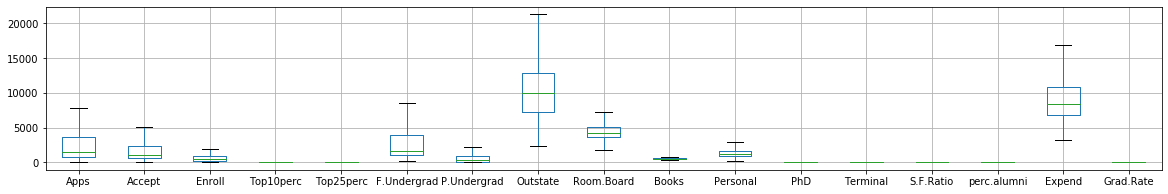

In [145]:
print('Outliers before scaling the data without handling the outliers') 
e2.boxplot(figsize=(20,3))

Outliers after scaling the data without handling the outliers


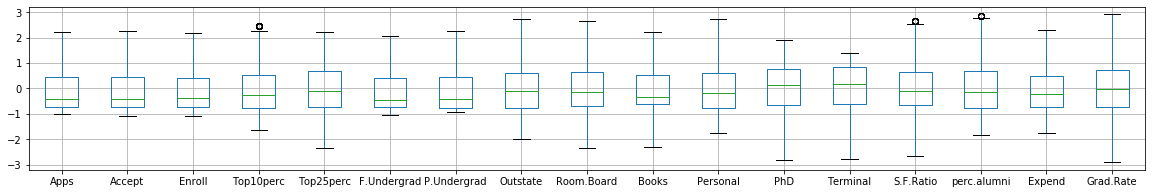

In [144]:
print('Outliers after scaling the data without handling the outliers')
e2_new.boxplot(figsize=(20,3))

In [162]:
print('If we compare the above graph for outliers before and after scaling these is difference between box plot represenation e.g') 
print('variable like Phd,Terminal,S.F ratio etc  which show the scale is not same for all the variables.After scaling There are still')
print('outliers exist in  variables like  S.Fratio,Perc.alumni,Top10perc etc')

If we compare the above graph for outliers before and after scaling these is difference between box plot represenation e.g
variable like Phd,Terminal,S.F ratio etc  which show the scale is not same for all the variables.After scaling There are still
outliers exist in  variables like  S.Fratio,Perc.alumni,Top10perc etc


In [141]:
print('2.5) Build the covariance matrix, eigenvalues and eigenvector.')
print('Note:- Before preparing the covariance matrix We have handled the outliers as well as standardize the dataset.')
print('In order to answer the 2.5 question We firsly dealt with outliers and done the scaling ')

2.5) Build the covariance matrix, eigenvalues and eigenvector.
Note:- Before preparing the covariance matrix We have handled the outliers as well as standardize the dataset.
In order to answer the 2.5 question We firsly dealt with outliers and done the scaling 


In [139]:
print('Handling the outliers in the dataset')
print('Defining the outlier functions') 
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

Handling the outliers in the dataset
Defining the outlier functions


In [138]:
print('Handling the outliers in the orginal data')
lapps,uapps=remove_outlier(e2['Apps'])
e2['Apps']=np.where(e2['Apps']>uapps,uapps,e2['Apps'])
e2['Apps']=np.where(e2['Apps']<lapps,lapps,e2['Apps'])

lraccept,uraccept=remove_outlier(e2['Accept'])
e2['Accept']=np.where(e2['Accept']>uraccept,uraccept,e2['Accept'])
e2['Accept']=np.where(e2['Accept']<lraccept,lraccept,e2['Accept'])


lEnroll,uEnroll=remove_outlier(e2['Enroll'])
e2['Enroll']=np.where(e2['Enroll']>uEnroll,uEnroll,e2['Enroll'])
e2['Enroll']=np.where(e2['Enroll']<lEnroll,lEnroll,e2['Enroll'])

lTop10perc,uTop10perc=remove_outlier(e2['Top10perc'])
e2['Top10perc']=np.where(e2['Top10perc']>uTop10perc,uTop10perc,e2['Top10perc'])
e2['Top10perc']=np.where(e2['Top10perc']<lTop10perc,lTop10perc,e2['Top10perc'])


lF,uF=remove_outlier(e2['F.Undergrad'])
e2['F.Undergrad']=np.where(e2['F.Undergrad']>uF,uF,e2['F.Undergrad'])
e2['F.Undergrad']=np.where(e2['F.Undergrad']<lF,lF,e2['F.Undergrad'])


lP,uP=remove_outlier(e2['P.Undergrad'])
e2['P.Undergrad']=np.where(e2['P.Undergrad']>uP,uP,e2['P.Undergrad'])
e2['P.Undergrad']=np.where(e2['P.Undergrad']<lP,lP,e2['P.Undergrad'])

lOutstate,uOutstate=remove_outlier(e2['Outstate'])
e2['Outstate']=np.where(e2['Outstate']>uOutstate,uOutstate,e2['Outstate'])
e2['Outstate']=np.where(e2['Outstate']<lOutstate,lOutstate,e2['Outstate'])


lRoom,uRoom=remove_outlier(e2['Room.Board'])
e2['Room.Board']=np.where(e2['Room.Board']>uRoom,uRoom,e2['Room.Board'])
e2['Room.Board']=np.where(e2['Room.Board']<lRoom,lRoom,e2['Room.Board'])

lBooks,uBooks=remove_outlier(e2['Books'])
e2['Books']=np.where(e2['Books']>uBooks,uBooks,e2['Books'])
e2['Books']=np.where(e2['Books']<lBooks,lBooks,e2['Books'])


lPersonal,uPersonal=remove_outlier(e2['Personal'])
e2['Personal']=np.where(e2['Personal']>uPersonal,uPersonal,e2['Personal'])
e2['Personal']=np.where(e2['Personal']<lPersonal,lPersonal,e2['Personal'])

lPhD,uPhD=remove_outlier(e2['PhD'])
e2['PhD']=np.where(e2['PhD']>uPhD,uPhD,e2['PhD'])
e2['PhD']=np.where(e2['PhD']<lPhD,lPhD,e2['PhD'])


lTerminal,uTerminal=remove_outlier(e2['Terminal'])
e2['Terminal']=np.where(e2['Terminal']>uTerminal,uTerminal,e2['Terminal'])
e2['Terminal']=np.where(e2['Terminal']<lTerminal,lTerminal,e2['Terminal'])


lSF,uSF=remove_outlier(e2['S.F.Ratio'])
e2['S.F.Ratio']=np.where(e2['S.F.Ratio']>uSF,uSF,e2['S.F.Ratio'])
e2['S.F.Ratio']=np.where(e2['S.F.Ratio']<lSF,lSF,e2['S.F.Ratio'])

lprec,uprec=remove_outlier(e2['perc.alumni'])
e2['perc.alumni']=np.where(e2['perc.alumni']>uprec,uprec,e2['perc.alumni'])
e2['perc.alumni']=np.where(e2['perc.alumni']<lprec,lprec,e2['perc.alumni'])

lExpend,uExpend=remove_outlier(e2['Expend'])
e2['Expend']=np.where(e2['Expend']>uExpend,uExpend,e2['Expend'])
e2['Expend']=np.where(e2['Expend']<lExpend,lExpend,e2['Expend'])

lGrad,uGrad=remove_outlier(e2['Grad.Rate'])
e2['Grad.Rate']=np.where(e2['Grad.Rate']>uGrad,uGrad,e2['Grad.Rate'])
e2['Grad.Rate']=np.where(e2['Grad.Rate']<lGrad,lGrad,e2['Grad.Rate'])




Handling the outliers in the orginal data


box plot after handliing the outliers


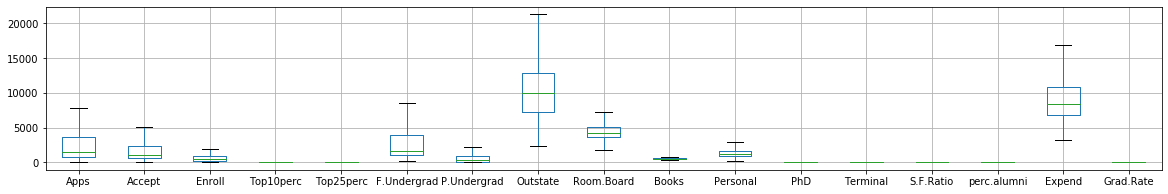

In [118]:
print('box plot after handliing the outliers')
e2.boxplot(figsize=(20,3))

In [117]:
print('Scaling the dataset after handling the outliers') 
from scipy.stats import zscore
e2_new=e2.apply(zscore)
e2_new.head()

Scaling the dataset after handling the outliers


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


box plot after handliing the outliers and scaling


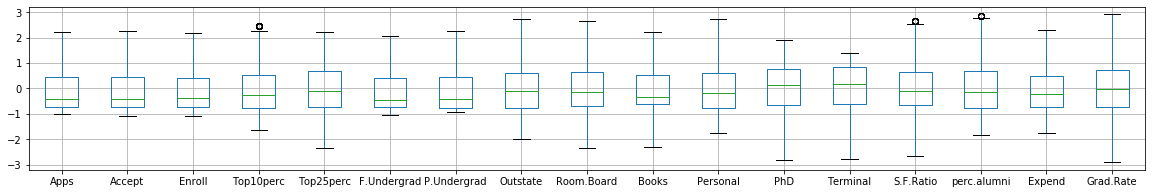

In [136]:
print('box plot after handliing the outliers and scaling') 
e2_new.boxplot(figsize=(20,3))

In [116]:
print('Note:- Before preparing the covariance matrix We have handled the outliers as well as standardize the dataset.')
cov_matrix = np.cov(e2_new.T)
print('Covariance Matrix \n%s', cov_matrix)



Note:- Before preparing the covariance matrix We have handled the outliers as well as standardize the dataset.
Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01 

In [135]:
print('Step 2- Get eigen values and eigen vector')
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)

Step 2- Get eigen values and eigen vector

 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]
Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-

In [134]:
print('2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).')
print('First Principal Components in Eigen Vector')
eig_vecs[0]

2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).
First Principal Components in Eigen Vector


array([-0.26217154,  0.31413626,  0.08101772, -0.09877617, -0.21989808,
        0.00218801, -0.02837151, -0.08994981,  0.130567  , -0.15646446,
       -0.08621328,  0.18216981, -0.59913764,  0.08997753,  0.08886979,
        0.5494284 ,  0.00541454])

In [50]:
e2_new.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [51]:
print('linear equation of First Principal component in terms of eigenvectors')
print('Apps(-0.2487656)+Accept(0.33159823)+Enroll(0.063092)+Top10perc(-0.28131053)+Top25perc(0.00574141)+')
print('F.Undergrad(0.01623744)+P.Undergrad(0.04248635)+Outstate(0.1030904+Room.Board(0.09022708)+Books(-0.0525098)+')
print('Personal(0.3589704)+PhD(-0.4591395)+Terminal(0.04304621)+S.F.Ratio(-0.13340581)+perc.alumni(0.0806328)+')
print('Expend(-0.59583097)+Grad.Rate(0.02407091)')

linear equation of First Principal component in terms of eigenvectors
Apps(-0.2487656)+Accept(0.33159823)+Enroll(0.063092)+Top10perc(-0.28131053)+Top25perc(0.00574141)+
F.Undergrad(0.01623744)+P.Undergrad(0.04248635)+Outstate(0.1030904+Room.Board(0.09022708)+Books(-0.0525098)+
Personal(0.3589704)+PhD(-0.4591395)+Terminal(0.04304621)+S.F.Ratio(-0.13340581)+perc.alumni(0.0806328)+
Expend(-0.59583097)+Grad.Rate(0.02407091)


In [133]:

print ('cumulative values of the eigenvalues')
tot=sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)


cumulative values of the eigenvalues
Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


Scree plot


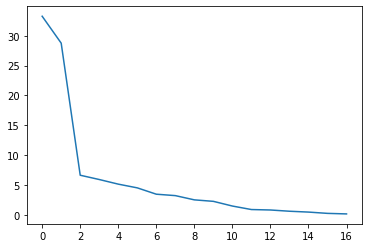

In [132]:
print('Scree plot')
plt.plot(var_exp)

In [130]:
print('Visually we can observe that their is steep drop in variance explained with increase in number of PC')
print(' We will proceed with 8 components here. But depending on requirement 90% variation or 8 components will also do good')


Visually we can observe that their is steep drop in variance explained with increase in number of PC
 We will proceed with 8 components here. But depending on requirement 90% variation or 8 components will also do good


Ploting


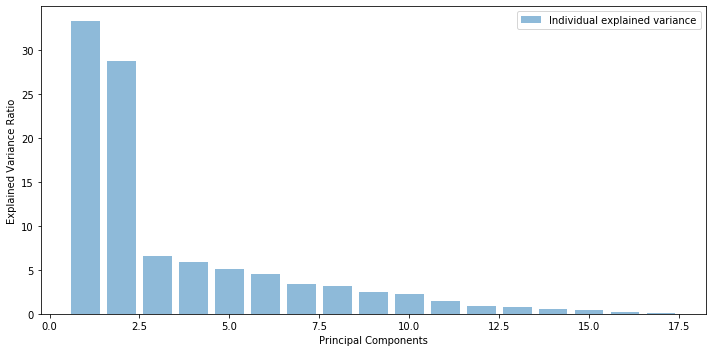

In [131]:
print('Ploting') 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size+1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
#plt.step(range(1, eig_vals.size+1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [129]:
print('Use PCA command from sklearn and find Principal Components')

print(' Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot')
from sklearn.decomposition import PCA

print(' NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 18 to 8')

pca = PCA(n_components=8)
data_reduced = pca.fit_transform(e2_new)
data_reduced

Use PCA command from sklearn and find Principal Components
 Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
 NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 18 to 8


array([[-1.60249937e+00,  9.93683013e-01,  3.00447636e-02, ...,
        -6.97475824e-01,  7.10616255e-01,  8.95166868e-01],
       [-1.80467545e+00, -7.04149922e-02,  2.12212752e+00, ...,
         9.94858508e-01, -3.96083169e-01,  2.59664018e-01],
       [-1.60828257e+00, -1.38279212e+00, -5.01512552e-01, ...,
        -1.02623665e+00, -1.65310575e-01, -4.08817874e-01],
       ...,
       [-5.76882673e-01,  1.77984611e-02,  3.22160336e-01, ...,
         5.04042792e-01, -1.45835209e+00, -2.89146665e-01],
       [ 6.57095200e+00, -1.18493014e+00,  1.32596561e+00, ...,
        -8.22745604e-01,  1.20132639e+00,  5.73988519e-03],
       [-4.77393067e-01,  1.04394672e+00, -1.42543835e+00, ...,
         1.05180970e+00,  1.07308672e+00,  6.05416581e-01]])

In [128]:
print('cumulative sum of variance explained with [n] features')
from sklearn.decomposition import PCA
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var 

cumulative sum of variance explained with [n] features


array([33.3, 62.1, 68.7, 74.6, 79.7, 84.2, 87.6, 90.8])

In [124]:
print('2.7)A Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?') 

print('The Cumulative 90.8 % gives the percentage of variance accounted for by the 8 components. For e.g,the cumulative percentage') 
print('for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the ')
print('number of components by selecting the components which explained the high variance')
print('In the above array we see that the first feature explains 33.3% of the variance within our data set while the first four' ) 
print('explain 79.7 and so on. If we employ 8 features we capture ~ 90.8% of the variance within the dataset,thus we gain very little ') 
print('by implementing an additional feature (think of this as diminishing marginal return on total variance explained).')

2.7)A Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
The Cumulative 90.8 % gives the percentage of variance accounted for by the 8 components. For e.g,the cumulative percentage
for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the 
number of components by selecting the components which explained the high variance
In the above array we see that the first feature explains 33.3% of the variance within our data set while the first four
explain 79.7 and so on. If we employ 8 features we capture ~ 90.8% of the variance within the dataset,thus we gain very little 
by implementing an additional feature (think of this as diminishing marginal return on total variance explained).


In [125]:
print('Perform PCA and export the data of the Principal Component scores into a data frame')
df = pd.DataFrame(data_reduced)
df.columns = df.columns+1
df.index = df.index + 1
df

Perform PCA and export the data of the Principal Component scores into a data frame


,1,2,3,4,5,6,7,8
1,-1.602499,0.993683,0.030045,-1.008422,-0.366886,-0.697476,0.710616,0.895167
2,-1.804675,-0.070415,2.122128,3.138941,2.453212,0.994859,-0.396083,0.259664
3,-1.608283,-1.382792,-0.501513,-0.036373,0.765997,-1.026237,-0.165311,-0.408818
4,2.803644,-3.367395,0.367768,-0.632914,-1.192601,-1.457080,-1.199862,0.357938
5,-2.200868,-0.099348,3.122523,0.657707,-1.828044,0.140915,-1.963228,-0.151893
...,...,...,...,...,...,...,...,...
773,-3.395392,1.995628,-0.744776,0.800067,-0.342732,0.573074,-0.171927,0.098249
774,0.319750,-0.314944,0.013597,0.653856,0.462527,0.741736,0.778473,-0.271679
775,-0.576883,0.017798,0.322160,-0.587259,0.175225,0.504043,-1.458352,-0.289147
776,6.570952,-1.184930,1.325966,0.077707,1.368517,-0.822746,1.201326,0.005740


In [126]:
print('2.7)B Perform PCA and export the data of the Principal Component scores into a data frame.')
df.to_csv('finalprinciaplComonents.csv',index=False,header=True)

2.7)B Perform PCA and export the data of the Principal Component scores into a data frame.


2.7)C Cummulative Distribution of Eigen values


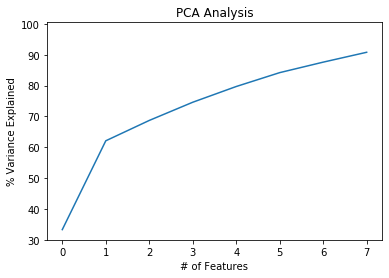

In [127]:
print('2.7)C Cummulative Distribution of Eigen values')
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [61]:
print('We have draw the graph for comulative Distribution of Eigen value. which show which principle components contribute') 
print('how much variance')

We have draw the graph for comulative Distribution of Eigen value. which show which principle components contribute
how much variance


In [120]:
print('2.8) Mention the business implication of using the Principal Component Analysis for this case study.')
print('Principal component analysis is a technique for dimension reduction — so it combines  input variables in a specific way') 
print('to drop the “least important” variables while still retaining the most valuable parts of all of the variables')
print('As an added benefit, each of the “new” variables after PCA are all independent of one another.')

print('with so many variables at hand it would be difficult  to decide which variables to focus on, in technical terms') 
print('It is important to reduce the dimension of your feature space.Reducing the dimension of the feature space is called ') 
print('dimensionality reduction') 

print('Initally In the given dataset , We have 18 variables . once PCA is done on the dataset we have reduced to 8 Principle')
print('components  which contains more than 90% of the variablity and seek most accurate data representation in a lower')
print('dimensional space .')





2.8) Mention the business implication of using the Principal Component Analysis for this case study.
Principal component analysis is a technique for dimension reduction — so it combines  input variables in a specific way
to drop the “least important” variables while still retaining the most valuable parts of all of the variables
As an added benefit, each of the “new” variables after PCA are all independent of one another.
with so many variables at hand it would be difficult  to decide which variables to focus on, in technical terms
It is important to reduce the dimension of your feature space.Reducing the dimension of the feature space is called 
dimensionality reduction
Initally In the given dataset , We have 18 variables . once PCA is done on the dataset we have reduced to 8 Principle
components  which contains more than 90% of the variablity and seek most accurate data representation in a lower
dimensional space .
